# **Random Forest**

In [355]:
# import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.metrics import accuracy_score , r2_score

## **1. For Classification**

In [356]:
df = pd.read_csv("./data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [357]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [358]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### **Number of features to consider at every split**
`max_features = [0.2,0.6,1.0]`

#### **Maximum number of levels in tree**
`max_depth = [2,8,None]`

#### **Number of samples**
`max_samples = [0.5,0.75,1.0]`

#### **Bootstrap samples**
`bootstrap = [True,False]`

#### **Minimum number of samples required to split a node**
`min_samples_split = [2, 5]`

#### **Minimum number of samples required at each leaf node**
`min_samples_leaf = [1, 2]`

In [359]:
rfc = RandomForestClassifier(
    n_estimators=70,
    min_samples_split=5,
    min_samples_leaf=2,
    max_samples=1.0,
    max_features=0.2,
    max_depth=2,
    bootstrap=True,
    random_state=42
)

In [360]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=0.2, max_samples=1.0,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=70,
                       random_state=42)

In [361]:
y_pred = rfc.predict(X_test)
print("Accuracy_Score:",accuracy_score(y_test , y_pred))

Accuracy_Score: 0.9016393442622951


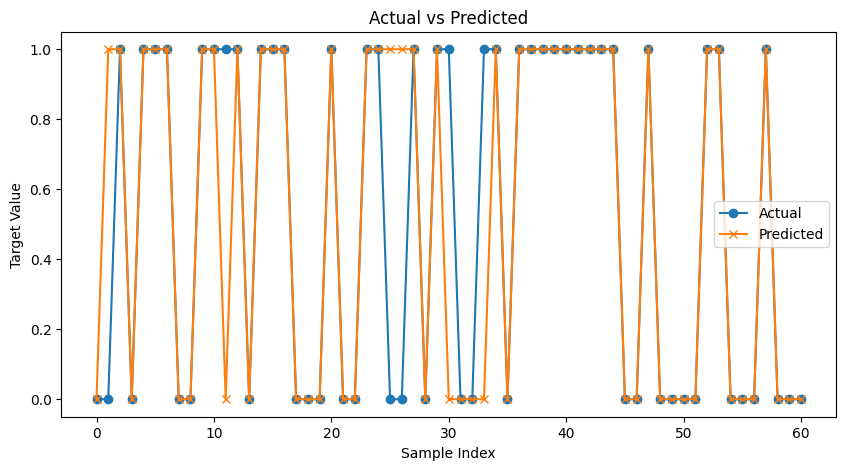

In [362]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(rfc.predict(X_test), label='Predicted', marker='x')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.show()

## **2. For Regression**

In [363]:
df1 = pd.read_csv("./data/concrete_data.csv")
df1.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [364]:
X = df1.drop('Strength',axis=1)
y = df1['Strength']

In [365]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [366]:
rfr = RandomForestRegressor(random_state=42)

In [367]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [368]:
y_pred = rfr.predict(X_test)
print("R2_Score:",r2_score(y_test , y_pred))

R2_Score: 0.8841401081258502


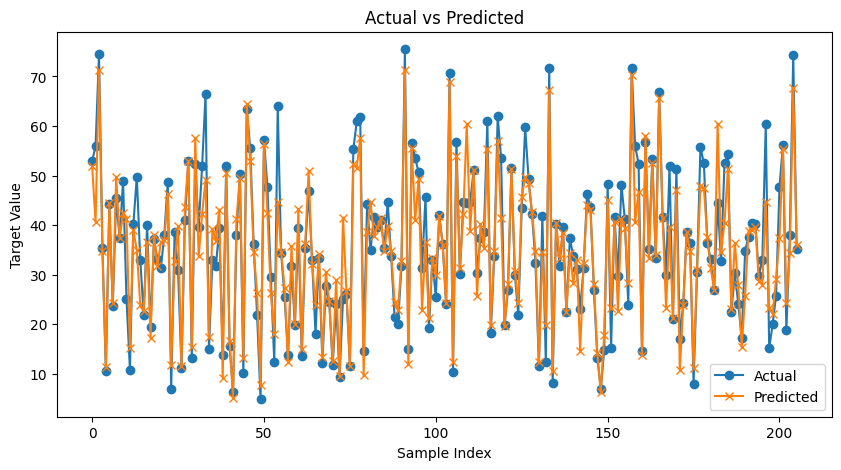

In [369]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(rfr.predict(X_test), label='Predicted', marker='x')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.show()